# Assignment1
#### Deep Learning, prof. Choi

## Import Libraries

In [1]:
import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

## Prepare the datasets

![](dataset.png)

In [2]:
x_train = torch.FloatTensor([[3.8, 700, 80, 50],
                             [3.2, 650, 90, 30],
                             [3.7, 820, 70, 40],
                             [4.2, 830, 50, 70],
                             [2.6, 550, 90, 60],
                             [3.4, 910, 30, 40],
                             [4.1, 990, 70, 20],
                             [3.3, 870, 60, 60],
                             [3.9, 650, 80, 50]
                            ])
y_train = torch.FloatTensor([[85], [80], [78], [87], [85], [70], [81], [88], [84]])

## Plot the graph with different conditions

### Cost according to learning rates

In [3]:
num_epochs = 10000
learning_rate = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8]

cost_with_lr = []
best_learning_rate = 0

for i in range(len(learning_rate)):
    W = torch.zeros([4, 1], requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    
    optimizer = optim.SGD([W, b], lr=learning_rate[i])

    for epoch in range(num_epochs):
        hypothesis = x_train.matmul(W) + b
        cost = torch.mean((hypothesis - y_train) ** 2)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if epoch == num_epochs-1:
            print(f'Num of epochs: {num_epochs}, Learning rate: {learning_rate[i]}, cost: {cost}')
            cost_with_lr.append(cost.item())

best_learning_rate = learning_rate[np.nanargmin(cost_with_lr)]
print('Best learning rate:', best_learning_rate)

Num of epochs: 10000, Learning rate: 0.0001, cost: nan
Num of epochs: 10000, Learning rate: 1e-05, cost: nan
Num of epochs: 10000, Learning rate: 1e-06, cost: 2.433581590652466
Num of epochs: 10000, Learning rate: 1e-07, cost: 14.371427536010742
Num of epochs: 10000, Learning rate: 1e-08, cost: 190.0982208251953
Best learning rate: 1e-06


### Plot cost with learning rate

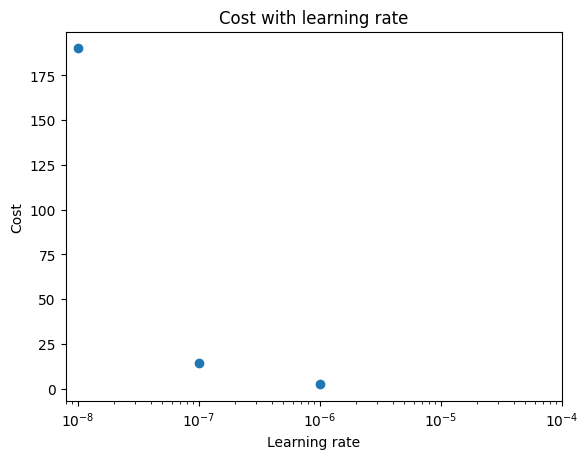

In [4]:
plt.scatter(learning_rate, cost_with_lr)
plt.xlabel('Learning rate')
plt.ylabel('Cost')
plt.title('Cost with learning rate')
plt.xscale('log')
plt.xticks(learning_rate)
plt.show()

### Cost according to number of epochs

In [5]:
num_epochs = [100, 1000, 10000, 100000]
cost_with_epoch = []
best_epoch = 0

for i in range(len(num_epochs)):
    W = torch.zeros([4, 1], requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    
    optimizer = optim.SGD([W, b], lr=best_learning_rate)

    for epoch in range(num_epochs[i]):
        hypothesis = x_train.matmul(W) + b
        cost = torch.mean((hypothesis - y_train) ** 2)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if epoch == num_epochs[i]-1:
            print(f'Num of epochs: {num_epochs[i]}, Learning rate: {best_learning_rate}, cost: {cost}')
            cost_with_epoch.append(cost.item())

best_epoch = num_epochs[np.argmin(cost_with_epoch)]
print('Best epoch:', best_epoch)

Num of epochs: 100, Learning rate: 1e-06, cost: 190.6692657470703
Num of epochs: 1000, Learning rate: 1e-06, cost: 14.377408981323242
Num of epochs: 10000, Learning rate: 1e-06, cost: 2.433581590652466
Num of epochs: 100000, Learning rate: 1e-06, cost: 2.419171094894409
Best epoch: 100000


### Plot cost with number of epochs

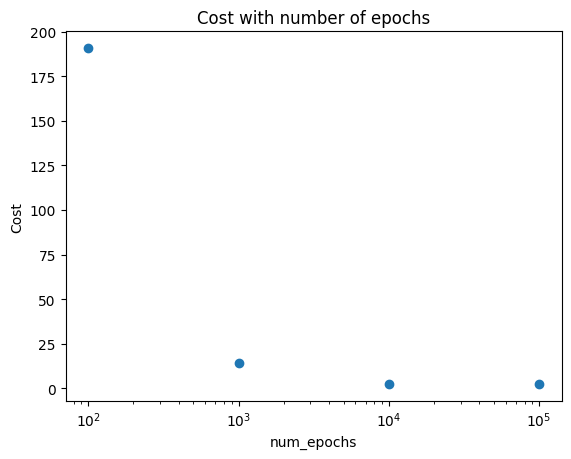

In [6]:
plt.scatter(num_epochs, cost_with_epoch)
plt.xlabel('num_epochs')
plt.ylabel('Cost')
plt.title('Cost with number of epochs')
plt.xscale('log')
plt.xticks(num_epochs)
plt.show()

## Train the model with best parameters

In [7]:
W = torch.zeros([4, 1], requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=best_learning_rate)

costs = []
num_epochs = best_epoch

for epoch in range(num_epochs):
    hypothesis = x_train.matmul(W) + b
    cost = torch.mean((hypothesis - y_train) ** 2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    costs.append(cost.item())

    if epoch % (num_epochs // 10) == 0:
        print(f"Epoch {epoch}/{num_epochs} - Cost: {cost.item()}")

Epoch 0/100000 - Cost: 6751.5556640625
Epoch 10000/100000 - Cost: 2.433574914932251
Epoch 20000/100000 - Cost: 2.431699514389038
Epoch 30000/100000 - Cost: 2.430103063583374
Epoch 40000/100000 - Cost: 2.4285054206848145
Epoch 50000/100000 - Cost: 2.4269261360168457
Epoch 60000/100000 - Cost: 2.425358533859253
Epoch 70000/100000 - Cost: 2.4237959384918213
Epoch 80000/100000 - Cost: 2.422241687774658
Epoch 90000/100000 - Cost: 2.420689105987549


## Print trained W, b

In [8]:
print('Weights of the model:', W.detach().numpy())
print('Bias of the model:', b.detach().numpy())

Weights of the model: [[0.04704666]
 [0.04406528]
 [0.41087732]
 [0.41505808]]
Bias of the model: [0.00795532]


## Cost with epoch (Best performance)

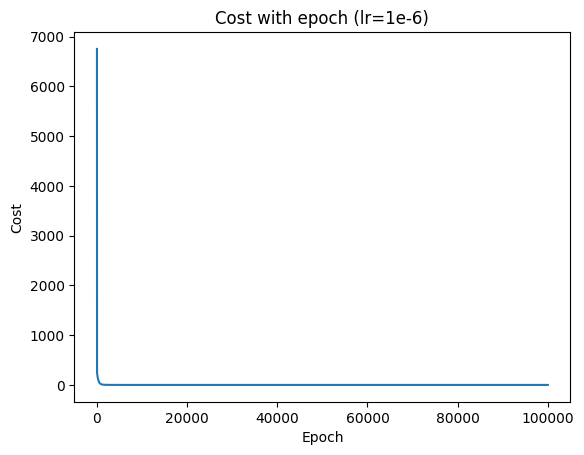

In [9]:
plt.plot(range(num_epochs), costs)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost with epoch (lr=1e-6)')
plt.show()

## Test model

In [10]:
test_data = torch.FloatTensor([[3.3, 700, 77, 84]])
predict = test_data.matmul(W) + b
pred_val = predict.squeeze().detach().numpy()
print('Total score is estimated %d' %(pred_val))

Total score is estimated 97
